In [100]:
from keras.datasets import mnist

In [101]:

(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [102]:
print(x_train.shape)
print(y_train.shape)

(60000, 28, 28)
(60000,)


In [103]:
x_test.dtype

dtype('uint8')

In [104]:
import matplotlib.pyplot as plt


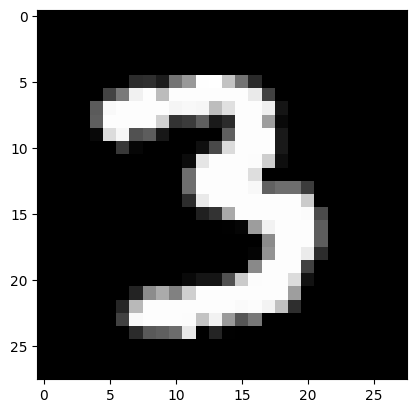

In [105]:
plt.imshow(x_test[500]/255, cmap=plt.cm.gray)

# TwoLayerNet in Keras

In [106]:
import keras

In [107]:
model = keras.Sequential([
    keras.layers.Dense(100, activation="sigmoid", input_shape=(784, )),
    keras.layers.Dense(10, activation="softmax")
])

In [108]:
model.compile(optimizer="SGD", loss="categorical_crossentropy", metrics=["accuracy"])

In [109]:
from keras.datasets import mnist

In [110]:

(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [111]:
x_train[0].shape

(28, 28)

In [112]:
x_test.shape

(10000, 28, 28)

In [113]:
keras.utils.to_categorical(y_train, num_classes=10)

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

## Preprocess datasets

In [114]:
# Reshape 28x28 to 784
x_train = x_train.reshape(x_train.shape[0], x_train.shape[1]*x_train.shape[2])
x_test = x_test.reshape(x_test.shape[0], x_test.shape[1]*x_test.shape[2])

In [115]:
x_train.shape

(60000, 784)

In [116]:
# Normalize values to 0 .. 1
x_train = x_train/255.0
x_test = x_test/255.0

In [117]:
y_train = keras.utils.to_categorical(y_train, num_classes=10)
y_test =  keras.utils.to_categorical(y_test, num_classes=10)

In [118]:
y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [119]:
model.fit(x_train, y_train, epochs=20, batch_size=32)

Epoch 1/20
1875/1875 [==============================] - 1s 384us/step - loss: 1.4564 - accuracy: 0.6935
Epoch 2/20
1875/1875 [==============================] - 1s 382us/step - loss: 0.7217 - accuracy: 0.8432
Epoch 3/20
1875/1875 [==============================] - 1s 381us/step - loss: 0.5357 - accuracy: 0.8702
Epoch 4/20
1875/1875 [==============================] - 1s 382us/step - loss: 0.4561 - accuracy: 0.8828
Epoch 5/20
1875/1875 [==============================] - 1s 385us/step - loss: 0.4118 - accuracy: 0.8903
Epoch 6/20
1875/1875 [==============================] - 1s 386us/step - loss: 0.3833 - accuracy: 0.8953
Epoch 7/20
1875/1875 [==============================] - 1s 380us/step - loss: 0.3630 - accuracy: 0.8990
Epoch 8/20
1875/1875 [==============================] - 1s 387us/step - loss: 0.3474 - accuracy: 0.9029
Epoch 9/20
1875/1875 [==============================] - 1s 440us/step - loss: 0.3353 - accuracy: 0.9049
Epoch 10/20
1875/1875 [==============================] - 1s 386u

In [120]:
predictions = model.predict(x_test[0:10])

1/1 [==============================] - 0s 19ms/step


In [121]:
import numpy as np

In [122]:
predictions = np.argmax(predictions, axis=1)

In [123]:
predictions

array([7, 2, 1, 0, 4, 1, 4, 9, 6, 9])

In [124]:
labels = np.argmax(y_test[0:10], axis=1)

In [125]:
labels

array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9])

In [126]:
predictions == labels

array([ True,  True,  True,  True,  True,  True,  True,  True, False,
        True])

# LeNet in Keras


In [127]:
from keras.models import Sequential, load_model, save_model
from keras.layers import Conv2D, AveragePooling2D, Flatten, Dense
from keras.datasets import mnist
from keras.utils import to_categorical

In [128]:
class LeNet:
    def __init__(self, batch_size=32, epochs=20):
        self.batch_size = batch_size
        self.epochs = epochs
        self.model = None
        self._create_lenet()
        self._compile()
    

    def _create_lenet(self):
        self.model = Sequential([
            Conv2D(filters=6, kernel_size=(5,5), 
                   activation='sigmoid', input_shape=(28, 28, 1), 
                   padding='same'),
            AveragePooling2D(pool_size=(2, 2), strides=2),
            
            Conv2D(filters=16, kernel_size=(5,5), 
                   activation='sigmoid', 
                   padding='same'),
            AveragePooling2D(pool_size=(2, 2), strides=2),

            Flatten(),

            Dense(120, activation='sigmoid'),
            Dense(84, activation='sigmoid'),
            Dense(10, activation='softmax')
        ])

    def _compile(self):
        if self.model is None:
            print('Error: Create a model first..')
        
        self.model.compile(optimizer='Adam',
                           loss='categorical_crossentropy',
                           metrics=['accuracy'])
        

    def _preprocess(self):
        # load mnist data
        (x_train, y_train), (x_test, y_test) = mnist.load_data()

        # normalize
        x_train = x_train/255.0
        x_test = x_test/255.0

        # add channel dim
        self.x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)  
        self.x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)  

        # one-hot encoding
        self.y_train = to_categorical(y_train, 10)
        self.y_test = to_categorical(y_test, 10)

    def train(self):
        self._preprocess()
        self.model.fit(self.x_train, self.y_train, 
                  batch_size=self.batch_size, 
                  epochs=self.epochs)

In [129]:
lenet = LeNet(batch_size=64, epochs=10)

In [130]:

lenet.train()

Epoch 1/10
938/938 [==============================] - 6s 6ms/step - loss: 0.9934 - accuracy: 0.6728
Epoch 2/10
938/938 [==============================] - 7s 8ms/step - loss: 0.2296 - accuracy: 0.9304
Epoch 3/10
938/938 [==============================] - 7s 7ms/step - loss: 0.1515 - accuracy: 0.9538
Epoch 4/10
938/938 [==============================] - 7s 8ms/step - loss: 0.1138 - accuracy: 0.9646
Epoch 5/10
938/938 [==============================] - 7s 7ms/step - loss: 0.0915 - accuracy: 0.9716
Epoch 6/10
938/938 [==============================] - 7s 8ms/step - loss: 0.0762 - accuracy: 0.9762
Epoch 7/10
938/938 [==============================] - 7s 8ms/step - loss: 0.0657 - accuracy: 0.9800
Epoch 8/10
938/938 [==============================] - 7s 8ms/step - loss: 0.0579 - accuracy: 0.9822
Epoch 9/10
938/938 [==============================] - 7s 8ms/step - loss: 0.0518 - accuracy: 0.9843
Epoch 10/10
938/938 [==============================] - 7s 7ms/step - loss: 0.0480 - accuracy: 0.9847

In [131]:
predictions = np.argmax(lenet.model.predict(lenet.x_test[0:10]), axis=1)

1/1 [==============================] - 0s 35ms/step


In [132]:
print(predictions)

[7 2 1 0 4 1 4 9 5 9]


In [133]:
labels = np.argmax(lenet.y_test[0:10], axis=1)

In [134]:
print(labels)

[7 2 1 0 4 1 4 9 5 9]


In [135]:
print(predictions == labels)

[ True  True  True  True  True  True  True  True  True  True]


In [136]:
class LeNet:
    def __init__(self, batch_size=32, epochs=10):
        self.batch_size = batch_size
        self.epochs = epochs
        self.model = None
        self._create_lenet()
        self._compile()
    
    def _create_lenet(self):
        self.model = Sequential([
            Conv2D(filters=6, kernel_size=(5,5), 
                   activation='sigmoid', input_shape=(28, 28, 1), 
                   padding='same'),
            AveragePooling2D(pool_size=(2, 2), strides=2),
            
            Conv2D(filters=16, kernel_size=(5,5), 
                   activation='sigmoid', 
                   padding='same'),
            AveragePooling2D(pool_size=(2, 2), strides=2),

            Flatten(),

            Dense(120, activation='sigmoid'),
            Dense(84, activation='sigmoid'),
            Dense(10, activation='softmax')
        ])

    def _compile(self):
        if self.model is None:
            print('Error: Create a model first..')
        
        self.model.compile(optimizer='Adam',
                           loss='categorical_crossentropy',
                           metrics=['accuracy'])
        

    def _preprocess(self):
        # load mnist data
        (x_train, y_train), (x_test, y_test) = mnist.load_data()

        # normalize
        x_train = x_train / 255.0
        x_test = x_test / 255.0

        # add channel dim
        self.x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)  
        self.x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)  

        # one-hot encoding
        self.y_train = to_categorical(y_train, 10)
        self.y_test = to_categorical(y_test, 10)

    def train(self):
        self._preprocess()
        self.model.fit(self.x_train, self.y_train, 
                  batch_size=self.batch_size, 
                  epochs=self.epochs, 
                  validation_data=(self.x_test, self.y_test))
    
    def save(self, model_path_name):
        save_model(self.model, f"{model_path_name}_cnn_model.keras")
        print(f"Model saved as {model_path_name}_cnn_model.keras")

    def load(self, model_path_name):
        self.model = load_model(f"{model_path_name}_cnn_model.keras")
        print(f"Model loaded from {model_path_name}_cnn_model.keras")

    def predict(self, images):
        if self.model is None:
            print("Model is not loaded or trained.")
            return None
        
        # Preprocess images (normalize and add channel dimension)
        images = [img / 255.0 for img in images]  # normalize each image
        images = np.array(images).reshape(-1, 28, 28, 1)  # reshape with channel dimension
        
        predictions = self.model.predict(images)
        return predictions.argmax(axis=1)  # return the class with the highest probability

In [137]:
if __name__ == "__main__":
    # Training the model
    lenet = LeNet(batch_size=32)  # You can adjust batch size and epochs as needed
    lenet.train()

    # Saving the model
    lenet.save("ipynb_dekhane")  # Saves as 'your_last_name_cnn_model.keras'

Epoch 1/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.7392 - accuracy: 0.7594 - val_loss: 0.2157 - val_accuracy: 0.9368
Epoch 2/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1763 - accuracy: 0.9460 - val_loss: 0.1178 - val_accuracy: 0.9634
Epoch 3/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1134 - accuracy: 0.9653 - val_loss: 0.0855 - val_accuracy: 0.9731
Epoch 4/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0845 - accuracy: 0.9743 - val_loss: 0.0663 - val_accuracy: 0.9776
Epoch 5/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0680 - accuracy: 0.9788 - val_loss: 0.0690 - val_accuracy: 0.9782
Epoch 6/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0579 - accuracy: 0.9821 - val_loss: 0.0484 - val_accuracy: 0.9850
Epoch 7/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0491 - accuracy: 0.9846 - val_loss: 0.0437 - val_accuracy: